In [35]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix,accuracy_score,classification_report)
import warnings
warnings.filterwarnings("ignore")

In [36]:
# installing imblearn used in handling oversampled data
!pip install imblearn

<h6>Reading CSV file</h6>:

In [37]:
df=pd.read_csv(r"/Users/Divya/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [38]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [39]:
df.shape

(1470, 35)

In [40]:
#checking datatype
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [41]:
#checking for null values
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

##### GRAPHS:-

###### Analysis of unique attrition attrition 

In [42]:
df.Attrition.value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

Text(0.5, 0, 'Attrition')

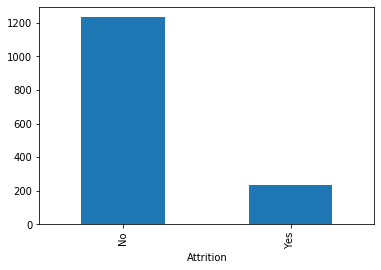

In [43]:
pd.value_counts(df['Attrition']).plot.bar()
plot.xlabel('Attrition')


According to above data we can easily correlate that the data is oversampled as  No is overleading to Yes at a great extent

###### Analysing the impact of department categorization on attrition

Text(0, 0.5, 'Attrition frequency')

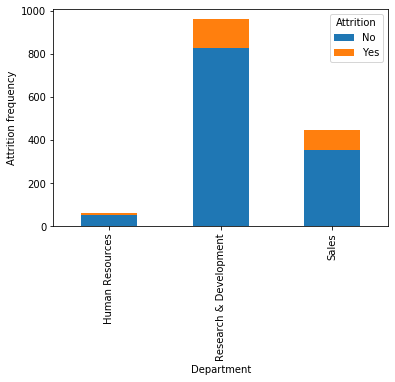

In [44]:
pd.crosstab(df['Department'],df['Attrition']).plot(kind="bar",stacked=True)
plot.xlabel("Department")
plot.ylabel("Attrition frequency")

From the above graph we can easily correlate that research and development has highest number of employees as compare to sales and human resources department. This feature is also making a noticeable impact on attrition.

###### Analysing the impact of gender on attrition

Text(0, 0.5, 'Attrition frequency')

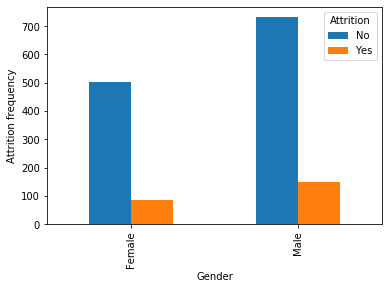

In [45]:
pd.crosstab(df['Gender'],df['Attrition']).plot(kind="bar")
plot.xlabel("Gender")
plot.ylabel("Attrition frequency")

From above graph we can observe that females are less wearing down than men. In this if we see the ratio then accordingly it is also impacting on attrition

###### Analysing the impact of Education fields of employees on attrition

In [46]:
df.EducationField.value_counts(normalize=True)

Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: EducationField, dtype: float64

Text(0, 0.5, 'Attrition')

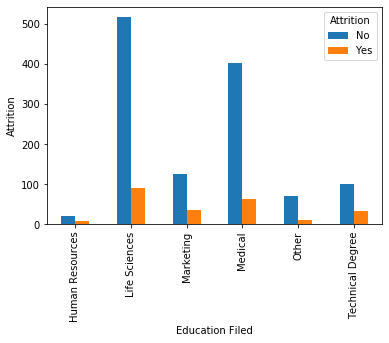

In [47]:
pd.crosstab(df['EducationField'],df['Attrition']).plot(kind="bar")
plot.xlabel("Education Filed")
plot.ylabel("Attrition")

As in above graph if we see life science and medical field contain large amount of employee and whereas human resources are less in number. Similarly, if we relate the attrition ratio accordig to their number than we can see its high in both medical and life science field.

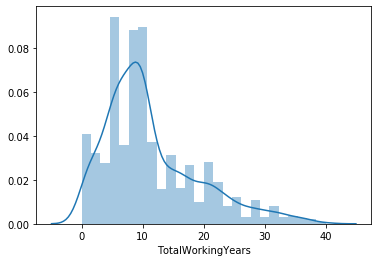

In [48]:
sb.distplot(df['TotalWorkingYears'])

This data is positively skewed and major number of employees are workings from 15 years

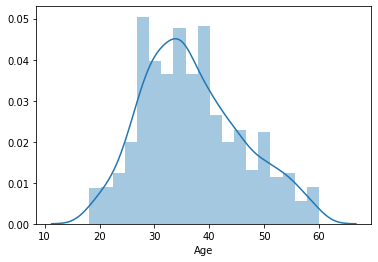

In [49]:
sb.distplot(df['Age'])

In [50]:
df["Age"].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

This graph is also somewhat positively skewed and its average age is around 18 to 19 which means may be there are interns working over there in a large number 

###### Encoding categorical values

In [51]:
label=LabelEncoder()

In [52]:
# finding all features containing categorical values and encoding them into specific label
p=0
q=1
for i in range (0,len(df.columns)):
    df2=df.iloc[:,p:q]
    if df2.columns.dtype=='O':
        df[df2.columns]=label.fit_transform(df[df2.columns])
        p=p+1
        q=q+1
    else:
        p=p+1
        q=q+1
    

In [53]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,0,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,0,1,...,3,0,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,0,2,...,1,0,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,0,3,...,2,0,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,4,...,3,0,1,6,3,2,2,2,2,2


###### Target value seperation

In [54]:
df.drop(columns=['EmployeeCount','StandardHours',"EmployeeNumber"],inplace=True)

In [55]:

X=df.drop(['Attrition'],axis=1)
Y=df["Attrition"]


###### Handling of oversampled data

In [56]:
oversampler=SMOTE()
X_sm,Y_sm=oversampler.fit_sample(X,Y)

###### Splitting of data into train and test sets

In [57]:
X_train_sm,X_test_sm,y_train_sm,y_test_sm=train_test_split(X_sm,Y_sm,test_size=0.2,random_state=100)


###### XGBoost Algorithm:-

It is a open source library provides an implementaion of gradient boosting decision trees which is designed to increase the performance.It contains XGBClassiffier and XGBRegressor used according to the nature of data, as here we have a data contain labels which means we have a classification problem so we have used XGBClassiffier

In [58]:
import xgboost as xgb

In [59]:
clf=xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
clf.fit(X_train_sm, y_train_sm)
ypre=clf.predict(X_test_sm)

In [60]:
accuracy_score(ypre,y_test_sm)

0.9331983805668016

Accuracy of our model is 93.31%

###### r2_score validation

In [61]:
from sklearn.metrics import r2_score

In [62]:
r2_score(y_test_sm,ypre)

0.7327935222672064